In [98]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# General utilities
import os
import glob
from time import time
import pprint
import bs4
import codecs

# Data manipulation
import pandas as pd
import numpy as np
import bs4  # BeautifulSoup4

# Plotting
from matplotlib import pyplot as plt
from matplotlib import cm

# Text pipeline and NLP packages
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer


# Scikit Learn
from sklearn import (manifold, datasets, decomposition)
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

from wordcloud import WordCloud

### Read in and basic overview

In [89]:
df = pd.read_csv('./Capital_Projects.csv')
print(df.shape)
df.tail()

(2259, 16)


,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
2254,09/01/2019 12:00:00 AM,1010,PRIOR NOTICE SIDEWALKS - BROOKLYN,PRIOR NOTICE SIDEWALKS - BROOKLYN,Streets and Roadways,NaN,DDC,DOT,Construction,08/06/2015,29427000.0,NaN,NaN,05/13/2020,NaN,NaN
2255,09/01/2019 12:00:00 AM,1011,"RECONSTRUCTION OF ROSEDALE AREA, PHASE 2",NaN,Streets and Roadways,NaN,DDC,DOT,Design,06/07/2018,39360000.0,NaN,NaN,08/14/2024,NaN,NaN
2256,09/01/2019 12:00:00 AM,1012,"RECONSTRUCTION OF FRONT STREET, MANHATTAN","Reconstruction of Front Street, Manhattan",Streets and Roadways,NaN,DDC,DOT,Construction Procurement,07/31/2015,27356000.0,NaN,NaN,06/16/2022,NaN,NaN
2257,09/01/2019 12:00:00 AM,1013,"GRAND CONCOURSE, PHASE 5",THE FIFTH PHASE OF THE RECONSTRUCTION OF THE G...,Streets and Roadways,NaN,DDC,DOT,Design,09/16/2019,78921000.0,NaN,NaN,09/13/2025,NaN,NaN
2258,09/01/2019 12:00:00 AM,1014,RECONSTRUCTION OF BROADWAY PHASE 2,RECONSTRUCTION OF BROADWAY PHASE 2 - The propo...,Streets and Roadways,NaN,DDC,DOT,Design,08/22/2019,31110000.0,NaN,NaN,07/17/2026,NaN,NaN


In [90]:
df.describe()

,PID,Budget Forecast,Latest Budget Changes,Total Budget Changes,Latest Schedule Changes,Total Schedule Changes
count,2259.000000,2.153000e+03,1.881000e+03,2.194000e+03,1866.000000,2186.000000
mean,487.699867,1.456504e+08,2.342525e+06,1.838732e+07,74.543944,669.718207
std,258.005332,3.241323e+08,3.387314e+07,7.440035e+07,1115.490817,718.792415
min,3.000000,-4.102606e+06,-3.129920e+08,-2.919002e+08,-32620.000000,-1462.000000
25%,314.000000,3.913500e+07,-1.750000e+05,0.000000e+00,0.000000,77.000000
50%,504.000000,6.078000e+07,1.300000e+04,5.827000e+06,0.000000,621.000000
75%,668.000000,1.103256e+08,2.100000e+06,2.990000e+07,149.500000,1097.000000
max,1014.000000,2.631661e+09,7.288500e+08,8.078026e+08,32872.000000,3253.000000


In [91]:
df.describe(include = 'all')

# Comparing the 1st row we see that there seem to be missing values in all fields except for
# date reported, PID, Project Name, Category and Managing Agency

,Date Reported As Of,PID,Project Name,Description,Category,Borough,Managing Agency,Client Agency,Current Phase,Design Start,Budget Forecast,Latest Budget Changes,Total Budget Changes,Forecast Completion,Latest Schedule Changes,Total Schedule Changes
count,2259,2259.000000,2259,2150,2259,1634,2259,1644,2154,2095,2.153000e+03,1.881000e+03,2.194000e+03,2137,1866.000000,2186.000000
unique,15,NaN,377,530,22,19,12,30,6,341,NaN,NaN,NaN,1019,NaN,NaN
top,09/01/2019 12:00:00 AM,NaN,Grand Concourse Metro North Railroad Bridge Co...,Design and construction of a new school,Streets and Roadways,Brooklyn,DDC,DEP,Design,06/30/2004,NaN,NaN,NaN,09/03/2021,NaN,NaN
freq,378,NaN,15,114,483,455,901,784,932,42,NaN,NaN,NaN,58,NaN,NaN
mean,NaN,487.699867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.456504e+08,2.342525e+06,1.838732e+07,NaN,74.543944,669.718207
std,NaN,258.005332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.241323e+08,3.387314e+07,7.440035e+07,NaN,1115.490817,718.792415
min,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.102606e+06,-3.129920e+08,-2.919002e+08,NaN,-32620.000000,-1462.000000
25%,NaN,314.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.913500e+07,-1.750000e+05,0.000000e+00,NaN,0.000000,77.000000
50%,NaN,504.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.078000e+07,1.300000e+04,5.827000e+06,NaN,0.000000,621.000000
75%,NaN,668.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.103256e+08,2.100000e+06,2.990000e+07,NaN,149.500000,1097.000000


In [92]:
df.dtypes

Date Reported As Of         object
PID                          int64
Project Name                object
Description                 object
Category                    object
Borough                     object
Managing Agency             object
Client Agency               object
Current Phase               object
Design Start                object
Budget Forecast            float64
Latest Budget Changes      float64
Total Budget Changes       float64
Forecast Completion         object
Latest Schedule Changes    float64
Total Schedule Changes     float64
dtype: object

In [93]:
df['Description'] = df['Description'].astype(str)

In [94]:
df.Description.dtype

dtype('O')

### Approach

* The project requires us to explore application of data science to the project planning domain and predict project success. We first look to define success since no criteria are provided in the data.
* There are 2 possible approaches
    * Defining measure of Success - We can look to define the project as a supervised learning problem
        * We are broadly defining success as adherence to plan. 
        * Any significant positive or negative variance from the original forecast would be defined as failure.
        * Finishing significantly early or under-budget should also be classified from a project planning perspective
        * Through the EDA we would explore variations inherent in the data and attempt to provide a more specific numeric goal.
        * Goals would be a combination of adherence to time and budget. 
        * We will also explore if we can define adherence to either time or budget and deviating from the other as partial success or failure
    * Another option is to look at the project as an unsupervised learning problem and let the data define attributes to success or failure.


### EDA

* Variance within the data - We see from the data that there are 2 sources of variance - variance between project and variance within the project.

**Task 1** - Variance between projects

* Information related to various projects across managing agencies, project categories and boroughs of NYC is provided 
* We aim to explore if the total budget changes and total schedule changes would vary across these categories

**Task 2** - Variance between projects

* Periods of significant variance - We will explore if the variances are discovered in the initial stages of the project or in the later stages. 
* The assumption is that there is a temporal aspect during the course of the project which also has an impact on the eventual success or failure.
* We plan to break the time periods for each project into 4 quartiles based on the field “date reported as of” and for each project map the budget changes and schedule changes to the quartiles. 
* We will attempt to ascertain if this has a significant impact on the overall project success. 
* For the current milestone, we will just pick a few projects and observe how the budget and completion forecasts vary throughout the project lifetime. We will aggregate and look for patterns later.

**Some of the other details are documented in the google doc:**

https://docs.google.com/document/d/1fYdIR0CIqxwKaVEzZSht1RRt9gywg-FzwVJgDPu_b2o/edit?usp=sharing


### Task 1 follows

In [114]:
def plot_changes(df, title, col1 = 'Total Budget Changes', col2 = 'Total Schedule Changes'):
    f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
    df[col1].plot(kind='bar', ax=ax[0], label=col1)
    df[col2].plot(kind='bar', ax=ax[1], label=col2)
    ax[0].set_xticks([])
    ax[0].set(xlabel=None)
    ax[0].legend(fontsize=20)
    ax[1].legend(fontsize=20)
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title(f'{title} of Changes', fontsize=25)
    plt.show()

(22, 2)


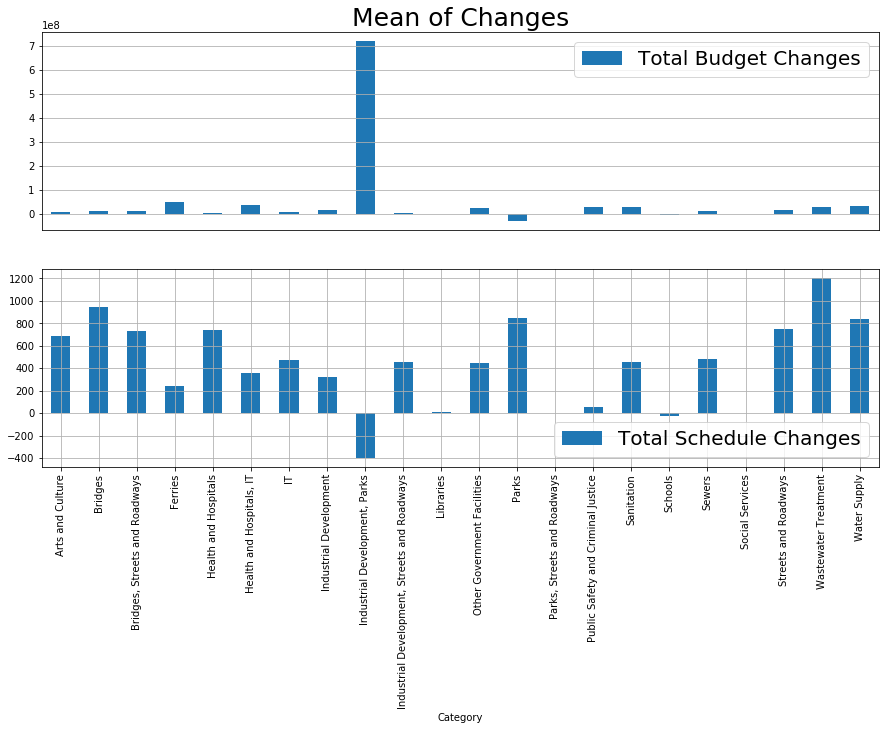

In [115]:
cat_mean = df.groupby('Category').agg({'Total Budget Changes' : 'mean', 'Total Schedule Changes' : 'mean'})
print(cat_mean.shape)
#cat_mean.head()
plot_changes(cat_mean, 'Mean')

(22, 2)


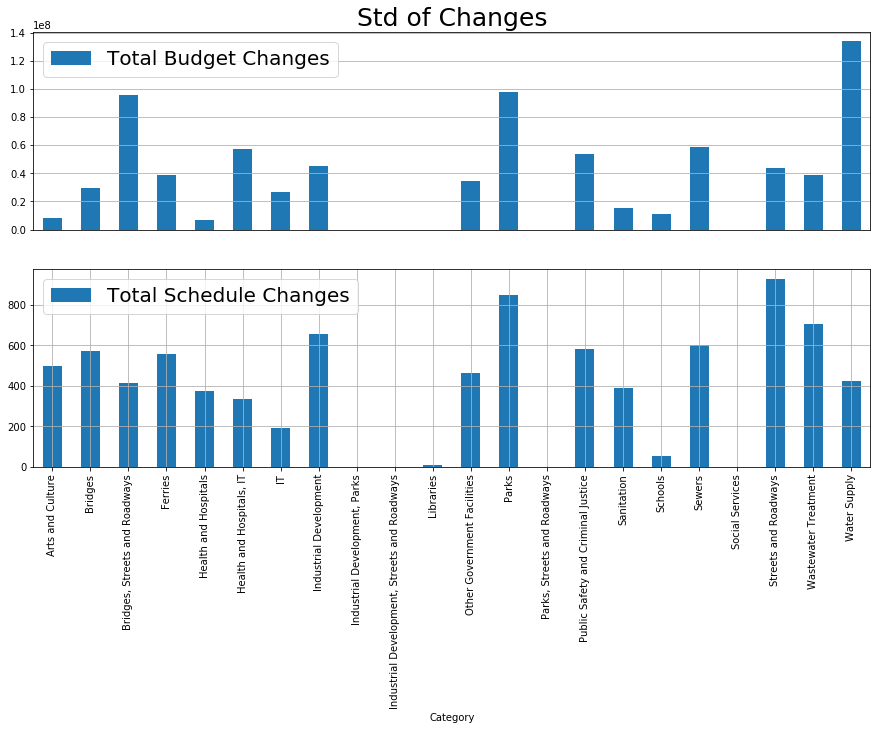

In [116]:
cat_std = df.groupby('Category').agg({'Total Budget Changes' : 'std', 'Total Schedule Changes' : 'std'})
print(cat_std.shape)
cat_std.head()
plot_changes(cat_std, 'Std')

#### Above, we look at mean and standard deviation of Total Budget changes and Total Schedule changes by Category. 

(12, 2)


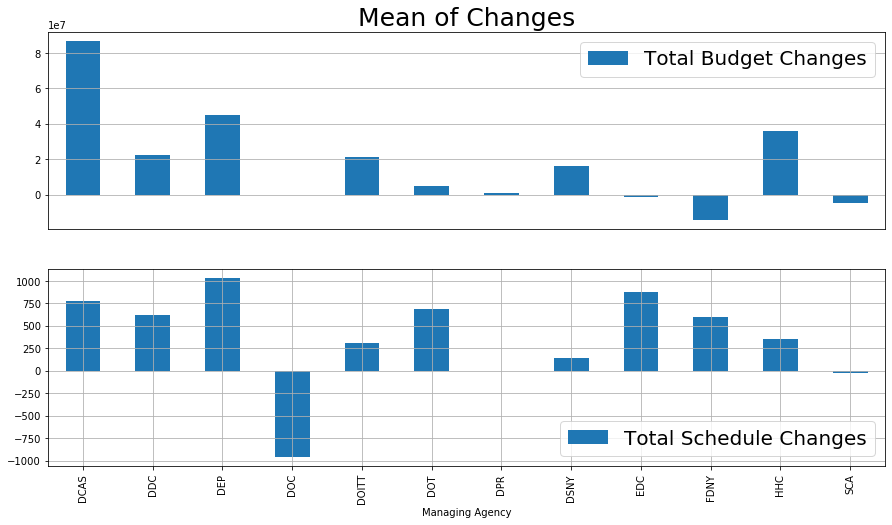

In [117]:
ma_mean = df.groupby('Managing Agency').agg({'Total Budget Changes' : 'mean', 'Total Schedule Changes' : 'mean'})
print(ma_mean.shape)
ma_mean.head()
plot_changes(ma_mean, 'Mean')

(12, 2)


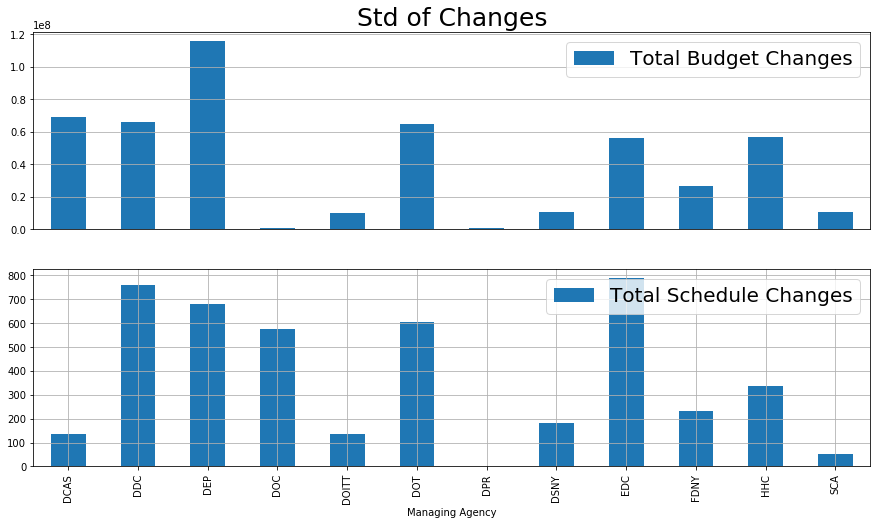

In [118]:
ma_std = df.groupby('Managing Agency').agg({'Total Budget Changes' : 'std', 'Total Schedule Changes' : 'std'})
print(ma_std.shape)
ma_std.head()
plot_changes(ma_std, 'Std')

#### Above, we look at mean and standard deviation of Total Budget changes and Total Schedule changes by Managing Agency. 

(19, 2)


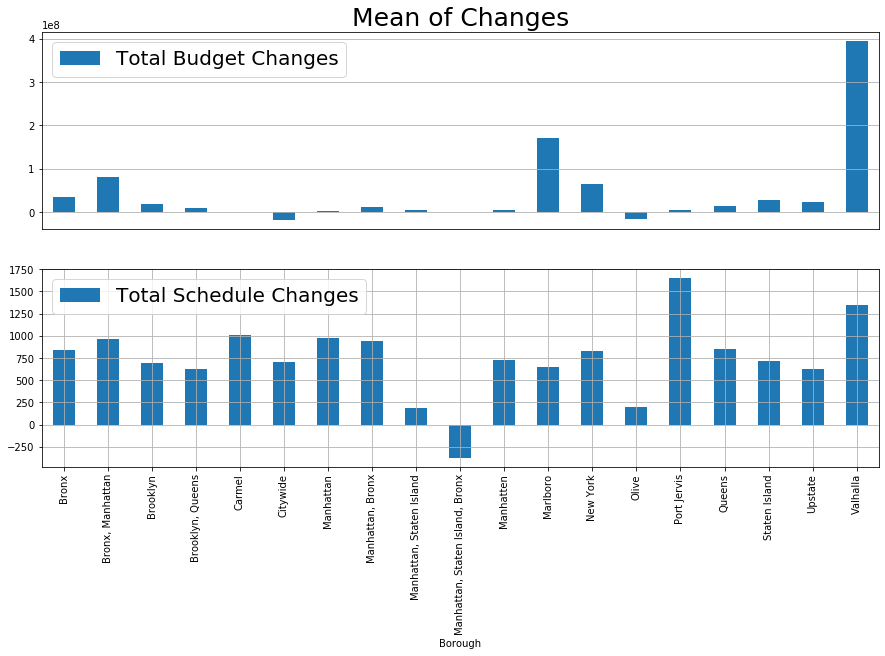

In [119]:
bu_mean = df.groupby('Borough').agg({'Total Budget Changes' : 'mean', 'Total Schedule Changes' : 'mean'})
print(bu_mean.shape)
bu_mean.head()
plot_changes(bu_mean, 'Mean')

(19, 2)


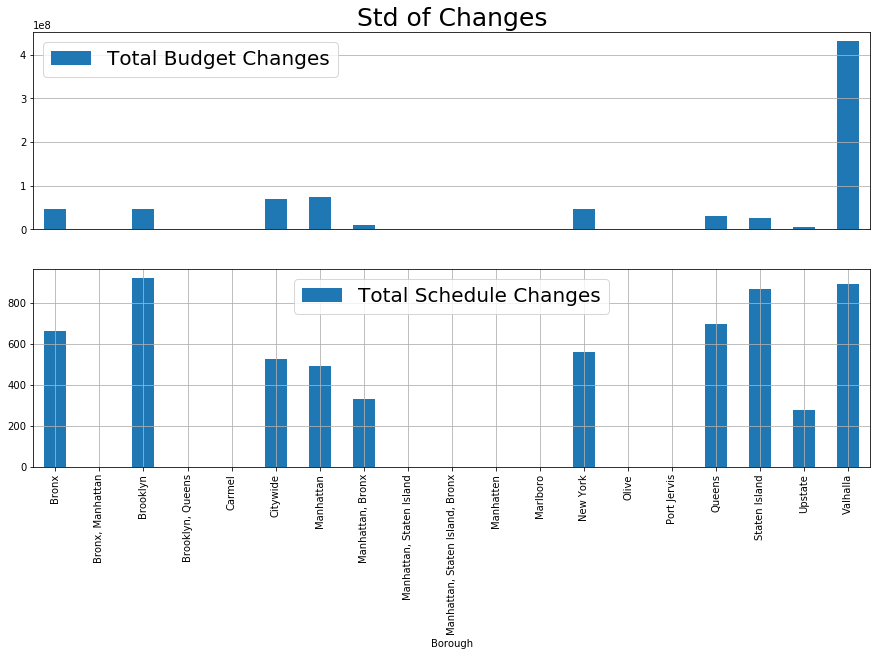

In [120]:
bu_std = df.groupby('Borough').agg({'Total Budget Changes' : 'std', 'Total Schedule Changes' : 'std'})
print(bu_std.shape)
plot_changes(bu_std, 'Std')

#### Above, we look at mean and standard deviation of Total Budget changes and Total Schedule changes by Category. 

In [121]:
df['Design Year'] = pd.DatetimeIndex(df['Design Start']).year

(23, 2)


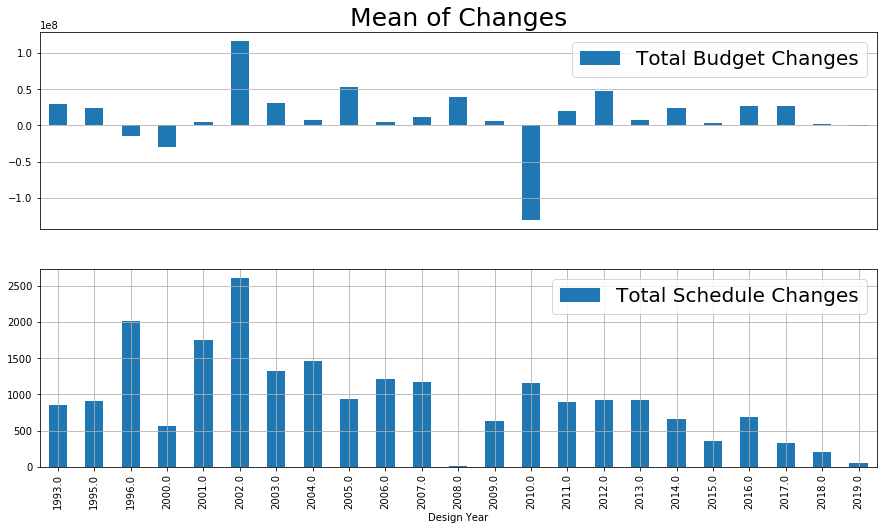

In [122]:
dy_mean = df.groupby('Design Year').agg({'Total Budget Changes' : 'mean', 'Total Schedule Changes' : 'mean'})
print(dy_mean.shape)
plot_changes(dy_mean, 'Mean')

(23, 2)


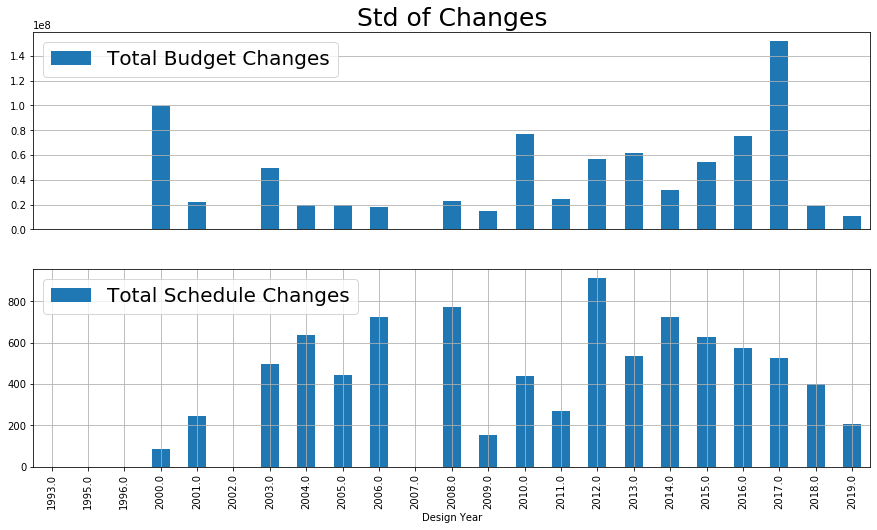

In [123]:
dy_std = df.groupby('Design Year').agg({'Total Budget Changes' : 'std', 'Total Schedule Changes' : 'std'})
print(dy_std.shape)
plot_changes(dy_std, 'Std')

#### Above, we look at mean and standard deviation of Total Budget changes and Total Schedule changes grouped by Design Year. 

(6, 2)


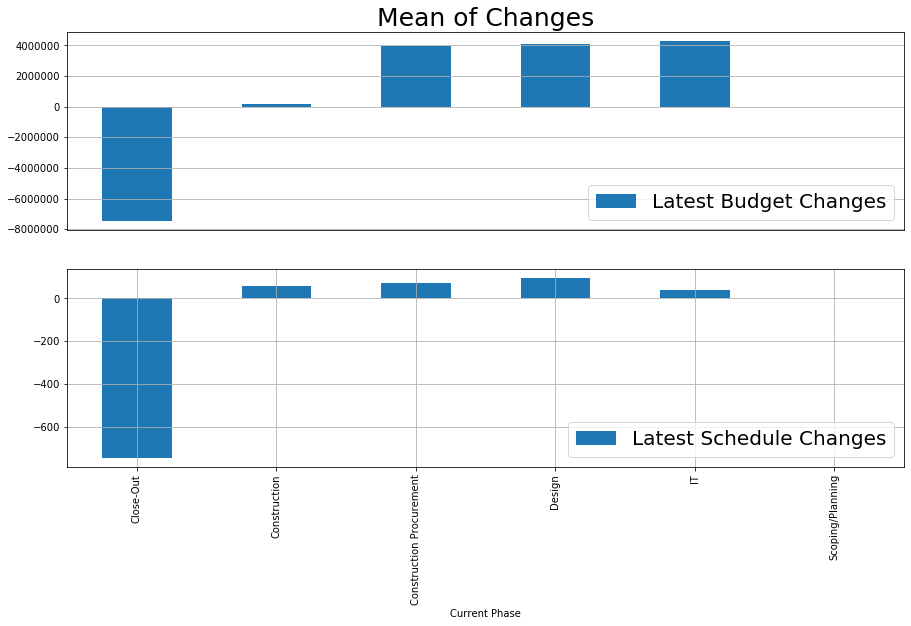

In [124]:
ph_mean = df.groupby('Current Phase').agg({'Latest Budget Changes' : 'mean', 'Latest Schedule Changes' : 'mean'})
print(ph_mean.shape)
plot_changes(ph_mean, 'Mean', 'Latest Budget Changes','Latest Schedule Changes')

(6, 2)


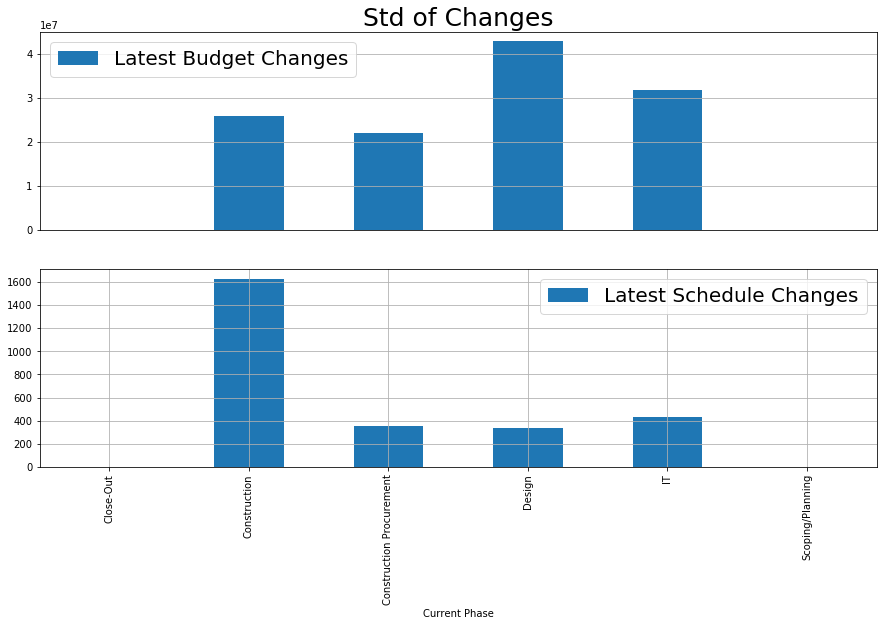

In [125]:
ph_std = df.groupby('Current Phase').agg({'Latest Budget Changes' : 'std', 'Latest Schedule Changes' : 'std'})
print(ph_std.shape)
plot_changes(ph_std, 'Std', 'Latest Budget Changes','Latest Schedule Changes')

#### Above, we look at mean and standard deviation of Latest Budget changes and Latest Schedule changes grouped by Category. 

In [126]:
def plot_dist(df, title):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
    sns.distplot(df['Total Budget Changes'], ax=ax[0], label='Total Budget Changes')
    sns.distplot(df['Total Schedule Changes'], ax=ax[1], label='Total Schedule Changes')
    ax[0].legend(fontsize=10)
    ax[1].legend(fontsize=10)
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title(f'Histogram of PID', fontsize=15)
    ax[1].set_title(f'Histogram of PID', fontsize=15)
    plt.show()

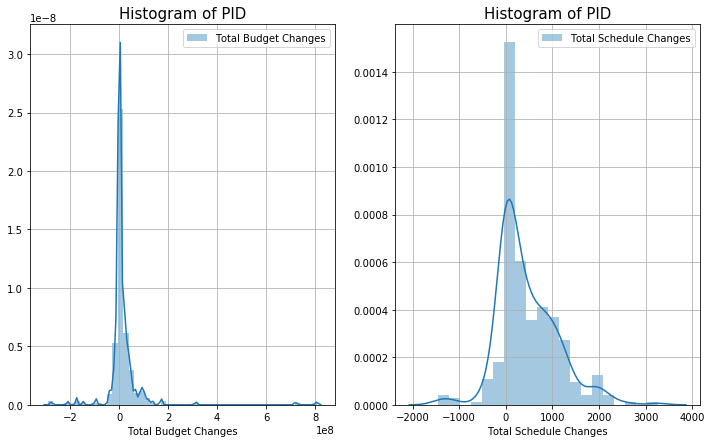

In [127]:
pid_mean = df.groupby('PID').agg({'Total Budget Changes' : 'mean', 'Total Schedule Changes' : 'mean'})
plot_dist(pid_mean.dropna(), 'Mean')

Text(0.5, 1.0, 'Box Plot of Total Budget Changes by PID mean')

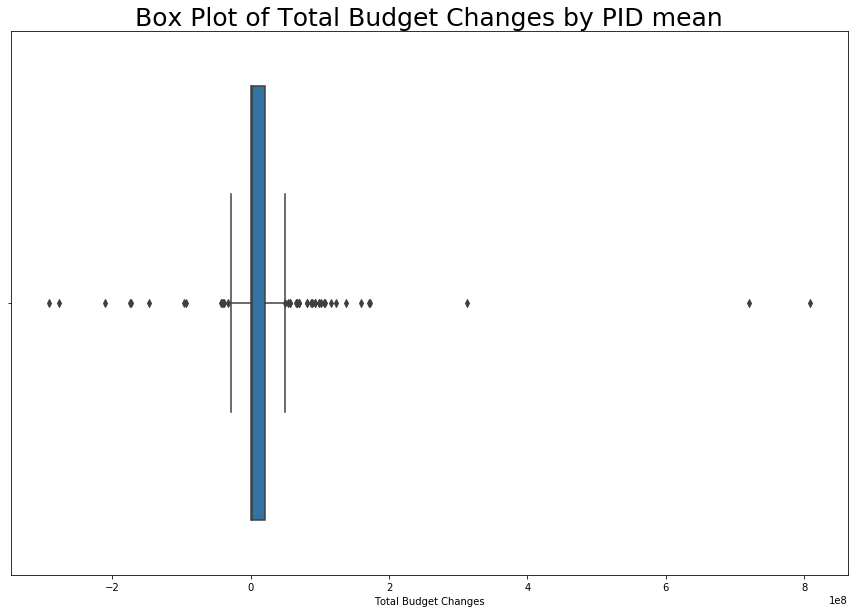

In [128]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x="Total Budget Changes",data=pid_mean)
plt.title('Box Plot of Total Budget Changes by PID mean', fontsize=25)

Text(0.5, 1.0, 'Box Plot of Schedule Changes by PID mean')

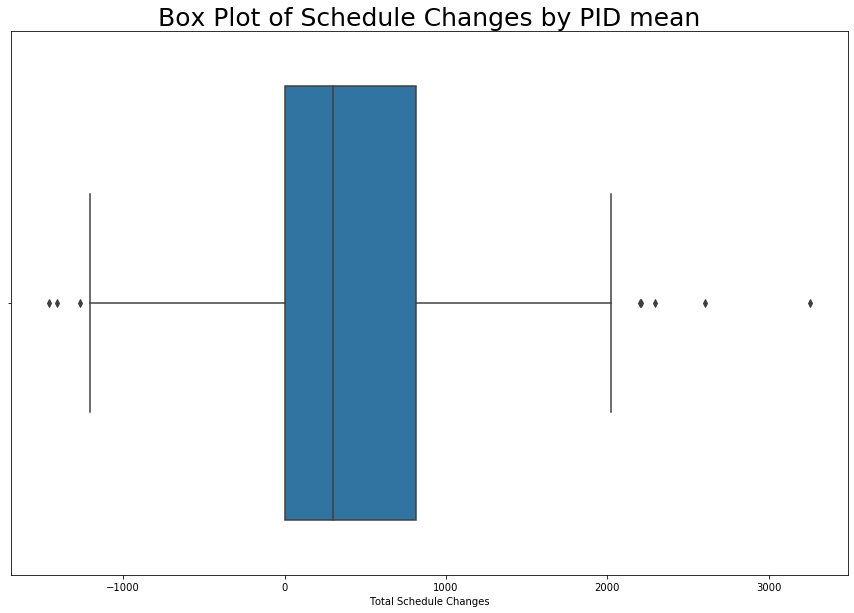

In [129]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x="Total Schedule Changes",data=pid_mean)
plt.title('Box Plot of Schedule Changes by PID mean', fontsize=25)

#### Above, we look at the box plots of Total Budget changes and Total Schedule changes by PID. 

### Task 2 follows

#### We wanted to quickly take a look a few projects to see a trend of how the budget forecast changed over the lifetime of the project. We will look at aggregated trend for all the projects later. Here is the forecasts for Project with PID=3. 

In [130]:
dfProj = df[df["PID"]==3]

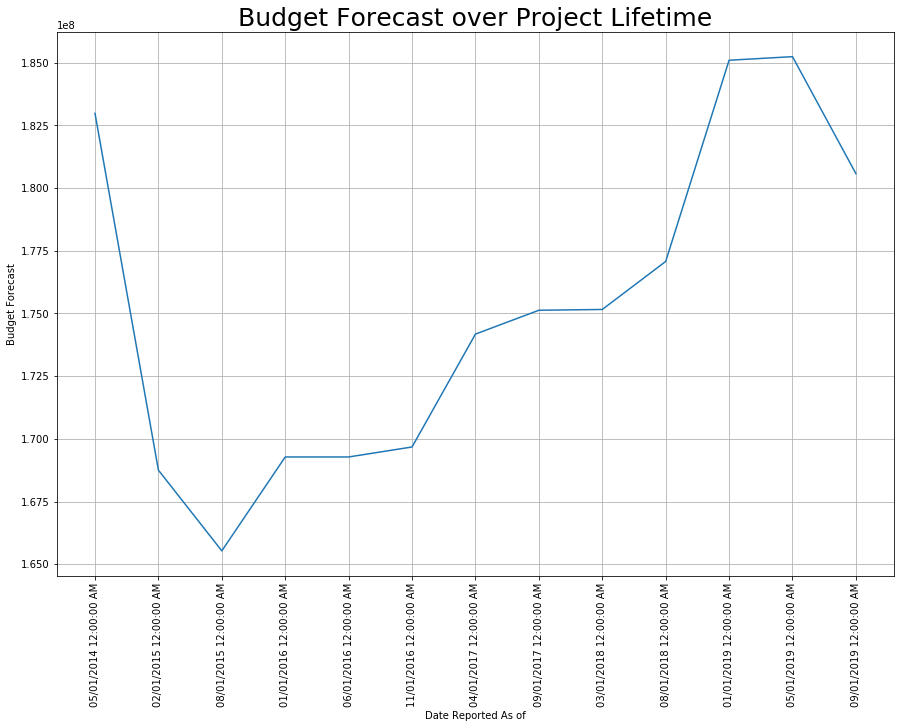

In [131]:
fig = plt.figure(figsize=(15,10))
plt.plot(dfProj["Date Reported As Of"], dfProj["Budget Forecast"])
plt.xticks(rotation=90)
plt.grid()
plt.title('Budget Forecast over Project Lifetime', fontsize=25)
plt.xlabel('Date Reported As of')
plt.ylabel('Budget Forecast')
plt.show()

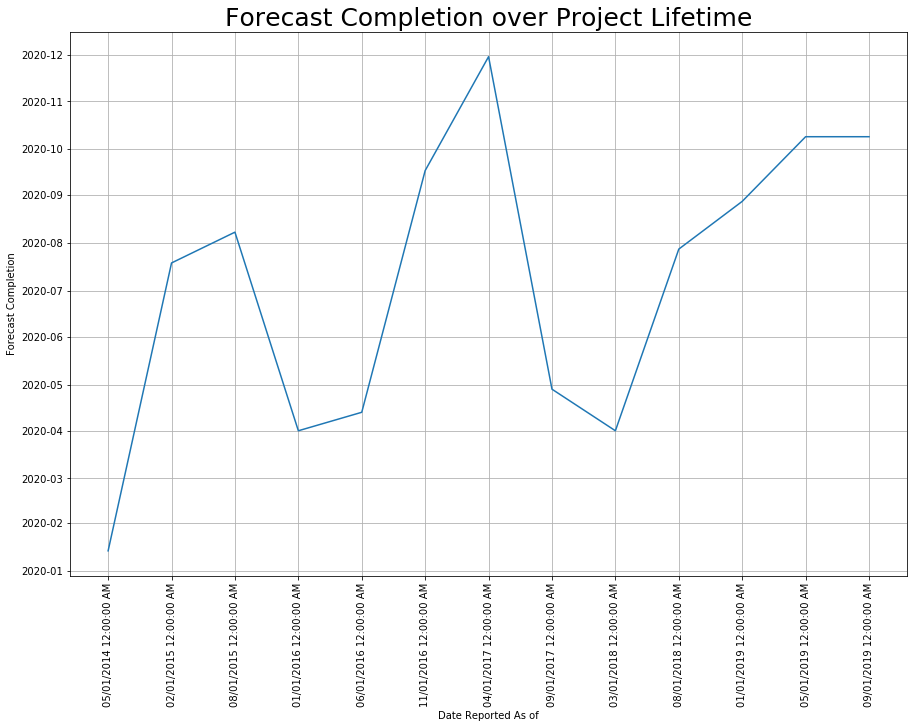

In [132]:
fig = plt.figure(figsize=(15,10))
plt.plot(dfProj["Date Reported As Of"], pd.to_datetime(dfProj["Forecast Completion"]))
plt.xticks(rotation=90)
plt.grid()
plt.title('Forecast Completion over Project Lifetime', fontsize=25)
plt.xlabel('Date Reported As of')
plt.ylabel('Forecast Completion')
plt.show()

## Key Questions: 

Given everything you have learned, if you faced this data set in the wild, how would you proceed? 

What are the important measures? 

What are the right questions to ask, and how can the data answer them?

#### Given everything you have learned, if you faced this data set in the wild, how would you proceed? 

* Identify missing data points and ascertain if they have impact
* There is a temporal aspect here so we need to take that into account for training and test split
* We would have to decide a cut-off date and classify projects before that as a training set and after that as a test set.
* We propose 2 approaches as outlined above
    * Supervised learning approach where we attempt to define success or failure depending on project completion
    * Unsupervised learning approach where we attempt to identify groupings inherent in the data.
* We anticipate the need for some featur engineering here to obatain insights from the data - e.g. during the project if the change to budget or time is high or low relative to the original timeline.

#### What are the important measures? 

* Important measures are those of success or failure and adherence to plan in terms of time and cost

#### More Data

* It would be good to explore if we can get more data related to interim reports or project closure reports that analyse the reasons for overruns or early wins. 
    * If we have reports for the projects then we could explore adding text data to the analysis by use of NLP
* We are also going through the links in the readme to explore if some of the data could be integrated into the provided data. 
    * In order to make use of this data we would need to map columns and consolidate different data dictionaries. Guidance from the teaching staff would be great.


#### Question for the teaching staff (for team discussion 1st)

* The dataset provided is small - about 2300 rows for about 378 projects. 
* While it is conceptually interesting, it does not seem that we would be able to apply most of the deep learning approaches taught in the course. 

Hence, is this an approprite project given the scope of the course?

## NLP - Text analysis and embedding of the Description column


In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/smahabha/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [86]:
# Define list of stop words and a function to normalize text

stops = set(stopwords.words("english"))
stops = stops.union(['i','say','like','year','one','also','said','use'])

# Define tokenizer to split sentence into tokens
tokenizer = RegexpTokenizer(r'[a-z]+')

def textNormalize(text):
    #print (len(text))
    textLower = text.lower() 
    textList = tokenizer.tokenize(textLower)
    stopped_doc_tokens = [word for word in textList if not word in stops]
    stopstem_doc_tokens0 = [PorterStemmer().stem(word) for word in stopped_doc_tokens]
    stopstem_doc_tokens = [word for word in stopstem_doc_tokens0 if len(word)>1]
    return stopstem_doc_tokens

#example to check how it works
textNormalize(".. 120 I'm in Delhi India,,, today is 2019. went flying")

['delhi', 'india', 'today', 'went', 'fli']

In [95]:
df['Normalized Description'] = df['Description'].apply(textNormalize)

In [100]:
df['Normalized Description'].head(20)

0     [th, ward, wwtp, mandat, upgrad, preliminari, ...
1     [th, ward, wwtp, mandat, upgrad, preliminari, ...
2     [th, ward, wwtp, mandat, upgrad, preliminari, ...
3     [th, ward, wwtp, mandat, upgrad, preliminari, ...
4     [th, ward, wwtp, mandat, upgrad, preliminari, ...
5     [th, ward, wwtp, mandat, upgrad, preliminari, ...
6     [th, ward, wwtp, mandat, upgrad, preliminari, ...
7     [th, ward, wwtp, mandat, upgrad, preliminari, ...
8     [th, ward, wwtp, mandat, upgrad, preliminari, ...
9     [th, ward, wwtp, mandat, upgrad, preliminari, ...
10    [th, ward, wwtp, mandat, upgrad, preliminari, ...
11    [th, ward, wwtp, mandat, upgrad, preliminari, ...
12    [th, ward, wwtp, mandat, upgrad, preliminari, ...
13    [exist, main, sewag, pump, deterior, pump, sys...
14    [exist, main, sewag, pump, deterior, pump, sys...
15    [exist, main, sewag, pump, deterior, pump, sys...
16    [exist, main, sewag, pump, deterior, pump, sys...
17    [exist, main, sewag, pump, deterior, pump,

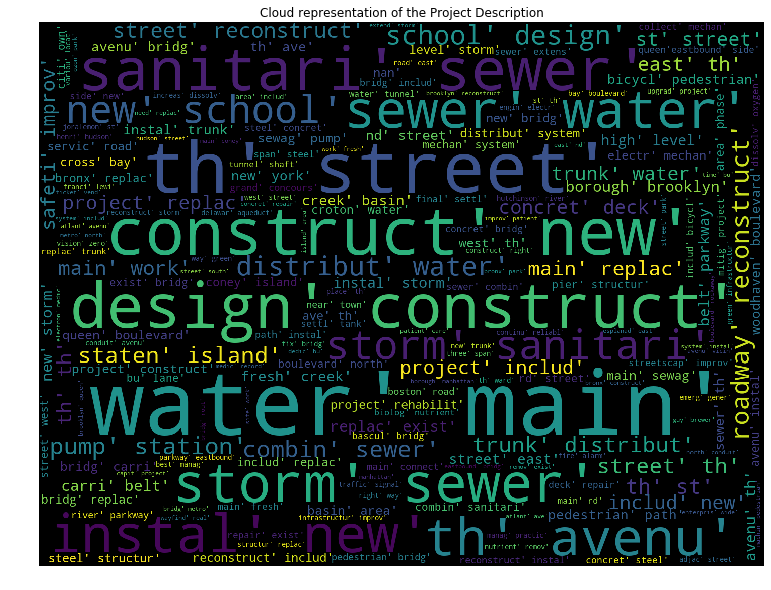

In [99]:
train_qs = pd.Series(df["Normalized Description"].tolist()).astype(str)
qs_text = " ".join(train_qs)

cloud = WordCloud(width=1440, height=1080).generate(qs_text)
plt.figure(figsize=(15, 10))
plt.title("Cloud representation of the Project Description")
plt.imshow(cloud);
plt.axis('off');